## - Exercici 1:

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
# Hipótesi nula que les dades procedeixen d'una distribució normal
# Hipótess alternativa les dades NO procedeixen d'una distribució normal

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [19]:
df = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding='latin_1')

In [20]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [65]:
#escollim l'atribut punts del dataframe i visualitzem les dades estadístiques del mateix
df['Pts'].describe()

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64

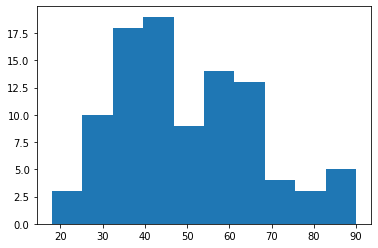

In [46]:
plt.hist(df['Pts'])
plt.show()

In [47]:
df['zscore'] = stats.zscore(df['Pts'])

In [50]:
p_valor = scipy.stats.norm.sf (abs (df['zscore']))
print(p_valor)

[0.00614878 0.01207328 0.01416758 0.04501724 0.01930756 0.01930756
 0.02595284 0.05123019 0.1154941  0.0740162  0.10383613 0.1154941
 0.18755479 0.12805314 0.12805314 0.12805314 0.12805314 0.15593819
 0.14153071 0.17128034 0.18755479 0.22285298 0.30366305 0.20475161
 0.20475161 0.32573565 0.22285298 0.24183299 0.28228432 0.26165753
 0.37169421 0.28228432 0.30366305 0.30366305 0.44399619 0.34843675
 0.34843675 0.37169421 0.39542974 0.39542974 0.44399619 0.46864748
 0.4934196  0.4081898  0.4934196  0.4081898  0.45705563 0.38423423
 0.45705563 0.45705563 0.43249361 0.38423423 0.4081898  0.4081898
 0.31529262 0.4081898  0.31529262 0.31529262 0.360713   0.38423423
 0.360713   0.3377073  0.3377073  0.3377073  0.31529262 0.23281656
 0.29353801 0.27250547 0.25224946 0.25224946 0.23281656 0.23281656
 0.21424523 0.21424523 0.19656572 0.19656572 0.14905923 0.19656572
 0.19656572 0.19656572 0.14905923 0.17980012 0.17980012 0.16396251
 0.14905923 0.13508925 0.12204463 0.12204463 0.12204463 0.122044

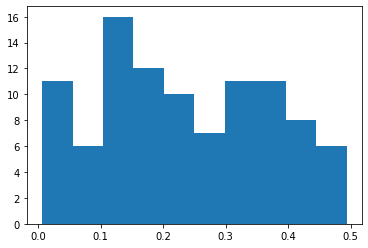

In [51]:
plt.hist(p_valor)
plt.show()

In [64]:
p_valor.mean()

0.23477968780949157

In [ ]:
# el valor P mitja es de 0.23 i com que el l'alfa per rebutjar l'hipotesi nula es de 0.05, i el valor p està per sobre, acceptem l'hipotesi nula.